In [1]:
import pandas as pd

# Load the CSV file to see its contents
data = pd.read_csv('/content/test.csv')
data.head()


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Removing non-numeric and identifier columns
numeric_data = data.select_dtypes(include=[np.number])

# Handling missing values by filling with the mean of each column
numeric_data_filled = numeric_data.fillna(numeric_data.mean())

# Standard PCA
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(numeric_data_filled)
pca_standard = PCA(n_components=2)
principal_components_standard = pca_standard.fit_transform(numeric_scaled)

# Non-standardized PCA
pca_non_standard = PCA(n_components=2)
principal_components_non_standard = pca_non_standard.fit_transform(numeric_data_filled)

# Explained variance ratio for both PCA methods
explained_variance_standard = pca_standard.explained_variance_ratio_
explained_variance_non_standard = pca_non_standard.explained_variance_ratio_

explained_variance_standard, explained_variance_non_standard


(array([0.16367085, 0.12638829]), array([0.88975185, 0.10684482]))

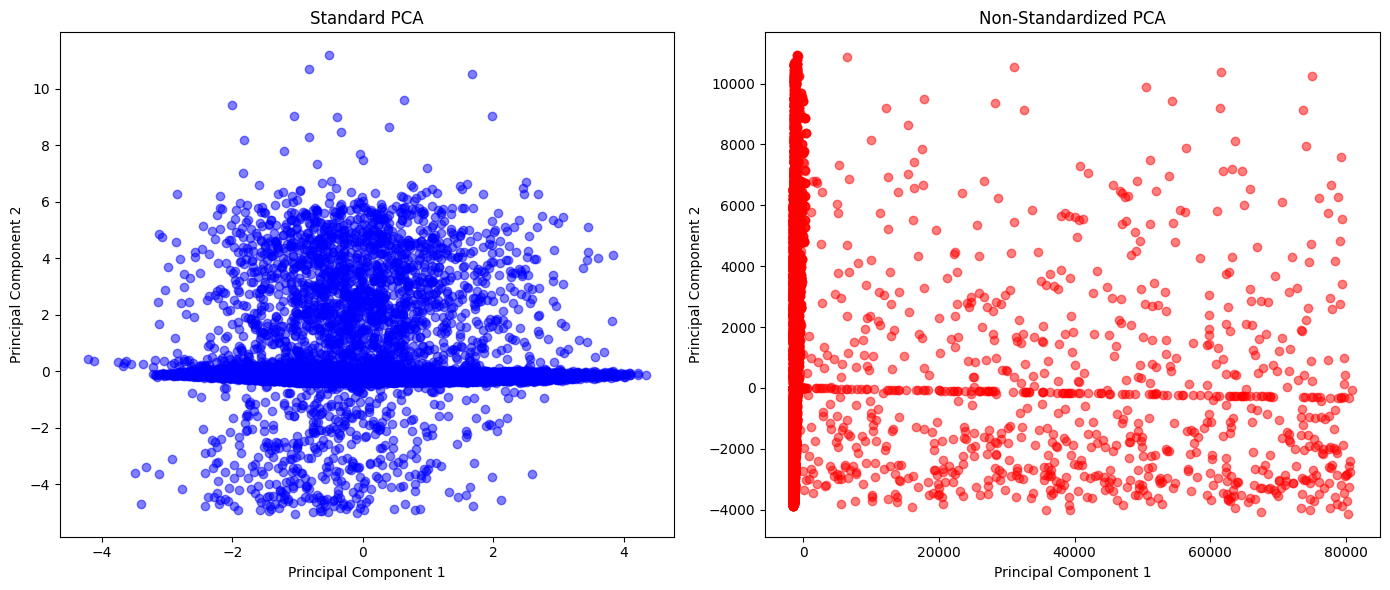

In [3]:
import matplotlib.pyplot as plt

# Creating a plot for the Standard PCA
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(principal_components_standard[:, 0], principal_components_standard[:, 1], alpha=0.5, color='blue')
ax[0].set_title('Standard PCA')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

# Creating a plot for the Non-Standardized PCA
ax[1].scatter(principal_components_non_standard[:, 0], principal_components_non_standard[:, 1], alpha=0.5, color='red')
ax[1].set_title('Non-Standardized PCA')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


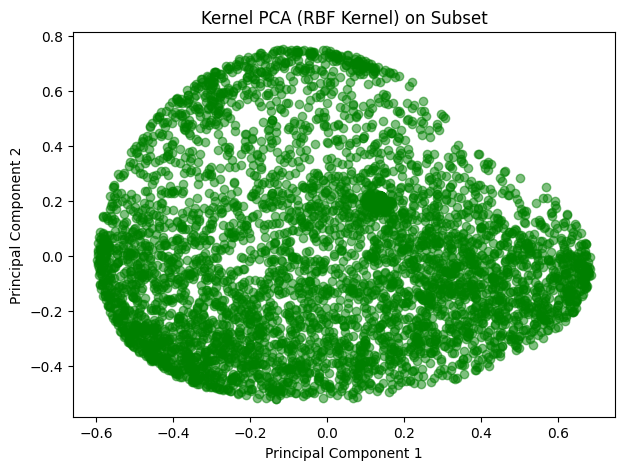

In [5]:
# Reducing the dataset size to a smaller subset for Kernel PCA to manage memory usage
from sklearn.decomposition import KernelPCA
subset_data = numeric_scaled[:5000]  # Using the first 5000 samples

# Performing Kernel PCA on the subset
kpca_subset = KernelPCA(n_components=2, kernel='rbf')
principal_components_kernel_subset = kpca_subset.fit_transform(subset_data)

# Plotting the results of Kernel PCA on the subset
plt.figure(figsize=(7, 5))
plt.scatter(principal_components_kernel_subset[:, 0], principal_components_kernel_subset[:, 1], alpha=0.5, color='green')
plt.title('Kernel PCA (RBF Kernel) on Subset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
